In [28]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column 
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
from linear_mcmc import *
import copy

from redTools import *
from Kcorrect import *
from calibTools import *

In [29]:
####################################### Set Axes
def set_axes(ax_list, xlim, ylim):
    for ax in ax_list:
        
        ax.set_ylim(ylim)
        ax.set_xlim(xlim) 
        ax.tick_params(which='major', length=8, width=1.5, direction='in')
        ax.tick_params(which='minor', length=6, color='#000033', width=1.0, direction='in')  

        y_ax = ax.twinx()
        y_ax.set_ylim(ylim)
        y_ax.set_yticklabels([])
        y_ax.minorticks_on()
        y_ax.tick_params(which='major', length=8, width=1.5, direction='in')
        y_ax.tick_params(which='minor', length=6, color='#000033', width=1.0, direction='in')        

        x_ax = ax.twiny()
        x_ax.set_xlim(xlim)
        x_ax.set_xticklabels([])
        x_ax.minorticks_on()
        x_ax.tick_params(which='major', length=8, width=1.0, direction='in')
        x_ax.tick_params(which='minor', length=6, color='#000033', width=1.0, direction='in')     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(18) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(18) 
####################################### Plotting Function

In [30]:
calib_maglim = [3974, 6699, 9962, 11139, 12460, 13163, 19871, 
                21102, 22277, 26761, 28378, 29128, 38148, 41020, 
                41093, 44982, 45084, 46127, 49448, 50073, 53641, 67908, 72228]

W1_maglim = [38803, 39181, 39431, 39619, 40005, 40107, 40147, 40588, 
             40604, 41567, 41829, 42768, 5807403, 5057729, 4002181, 4321374, 37814, 
             14548, 14590]

table   = np.genfromtxt('corrected_mags_linewidth_all.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

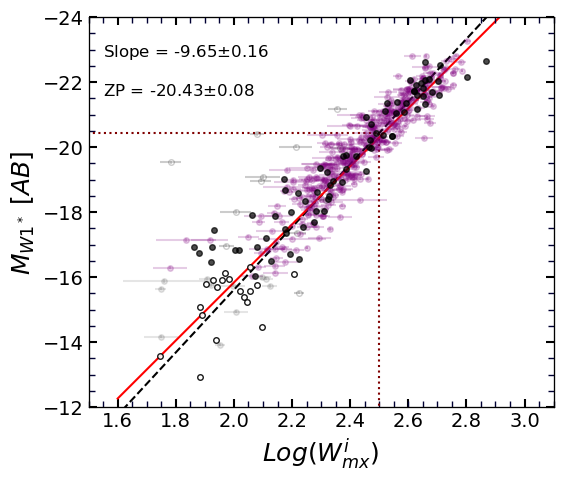

In [31]:
band = 'w1'

fig, ax, Clusters, S_ZP = makeTF(table, pgcFaint=W1_maglim, calib_maglim=calib_maglim, 
                                 band=band, makePlot=True)

w_ = np.linspace(1.6, 3 , 20)
ax.plot(w_, -8.93*(w_-2.5)-20.30, '-', color='r')


In [32]:
slope = S_ZP[0]
slope_e = S_ZP[1]
zp    = S_ZP[2]
zp_e    = S_ZP[3]

zp_calibs = all_ZP(table, band=band, slope=slope, pgcFaint=calib_maglim)

# fig, ax = makeFig(band=band, xLim = (1.5,3.1), yLim = (-12,-24), MAGabs=True)

key0 = 'NEST_100002'
myCluster = Clusters[key0]
zp_virgo  = myCluster['zp']

MAG       = myCluster['mag']-zp_virgo+zp
MAG_w     = myCluster['mag_w']-zp_virgo+zp
logWimx   = myCluster['logWimx']
logWimx_w = myCluster['logWimx_w']
logWimx_e = myCluster['logWimx_e']
pgc       = myCluster['pgc']
pgc_w     = myCluster['pgc_w']

for i, key in enumerate(Clusters):
    if key!=key0:
        myCluster = Clusters[key]
        zp_ = myCluster['zp']
        
        MAG       = np.concatenate((MAG, myCluster['mag']-zp_+zp))
        MAG_w     = np.concatenate((MAG_w, myCluster['mag_w']-zp_+zp))
        logWimx   = np.concatenate((logWimx, myCluster['logWimx']))
        logWimx_w = np.concatenate((logWimx_w, myCluster['logWimx_w']))
        logWimx_e = np.concatenate((logWimx_e, myCluster['logWimx_e']))
        pgc       =  np.concatenate((pgc, myCluster['pgc']))
        pgc_w     =  np.concatenate((pgc, myCluster['pgc_w']))


indx = []
indx_ = []    
for i, id in enumerate(pgc):
    if not id in W1_maglim:
        indx.append(i)
    else:
        indx_.append(i) # faint

        
MAG_faint       = []
logWimx_faint   = []
pgc_faint       = []

if len(indx_)>0:
    MAG_faint       = MAG[indx_]
    logWimx_faint   = logWimx[indx_]
    pgc_faint       = pgc[indx_]

if len(indx)>0:
    MAG       = MAG[indx]
    logWimx   = logWimx[indx]
    logWimx_e = logWimx_e[indx]
    pgc       = pgc[indx]


410
73
NEST_200092 24
NEST_200037 11
NEST_200017 0
NEST_200005 31
NEST_200006 19
NEST_100014 0
NEST_200003 6
NEST_100001 74
NEST_100003 0
NEST_100002 36
NEST_100005 62
NEST_200045 13
NEST_100007 33
NEST_100006 0
NEST_100008 37
NEST_200016 26
NEST_100030 17
NEST_200015 0
NEST_100018 12
NEST_200012 20


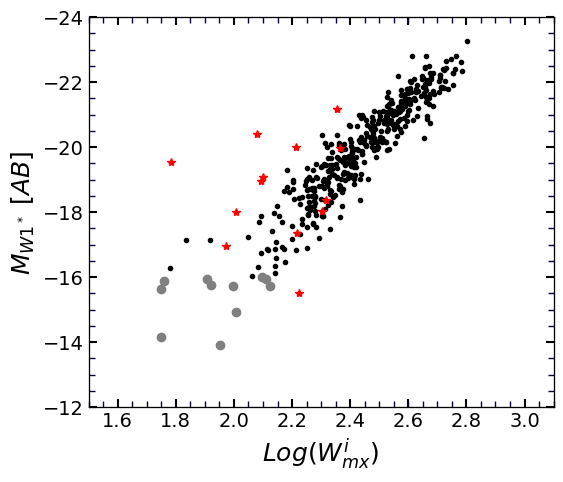

In [33]:
fig, ax = makeFig(band=band, xLim = (1.5,3.1), yLim = (-12,-24), MAGabs=True)
ax.plot(logWimx, MAG, '.', color='k')
ax.plot(logWimx_faint, MAG_faint, 'o', color='gray')
ax.plot(logWimx_w, MAG_w, '*', color='red')

print len(MAG)
n=0
for idd in zp_calibs['pgc']:
    if not idd in calib_maglim:
        n+=1
print n

for key in Clusters:
    print key, len(Clusters[key]['pgc'])

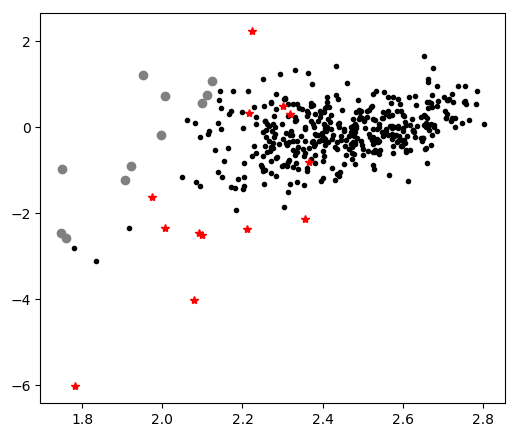

In [34]:
delta = MAG - (slope*(logWimx-2.5)+zp)
delta_faint = MAG_faint - (slope*(logWimx_faint-2.5)+zp)
delta_w = MAG_w - (slope*(logWimx_w-2.5)+zp)

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)
# ax.set_xlim(xLim)        
# ax.set_ylim(yLim)


ax.plot(logWimx_faint, delta_faint, 'o', color='gray')
ax.plot(logWimx, delta, '.', color='black')

ax.plot(logWimx_w, delta_w, '*', color='red')

-0.08417653840846562

-0.08417653840846562 0.6219533111834552
0.6211933653725881
0.5798546268809677
0.5876587155994234


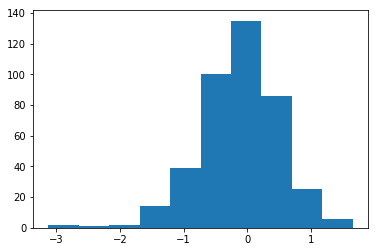

In [35]:
plt.hist(delta)
print np.median(delta)

Y_fit2 = delta
med = np.median(Y_fit2)
std = np.sqrt(np.mean((Y_fit2-med)**2))
indx, = np.where(Y_fit2<med+3*std)
Y_fit1 = Y_fit2[indx]
indx, = np.where(Y_fit1>med-3*std)
Y_fit2 = Y_fit1[indx]
print
print med, std
print np.std(delta)
print np.std(Y_fit2)
print np.sqrt(np.mean(Y_fit2**2))

In [36]:
catal   = np.genfromtxt('ESN_HI_catal_all.csv' , delimiter=',', 
                        filling_values=-1, names=True, dtype=None, encoding=None)
pgc_catal   = catal['pgc']
R50u_catal  = catal['R50_u']
R50g_catal  = catal['R50_g']
R50r_catal  = catal['R50_r']
R50i_catal  = catal['R50_i']
R50z_catal  = catal['R50_z']
R50w1_catal = catal['R50_w1']
R50w2_catal = catal['R50_w2']
Sba_catal   = catal['Sba']
Wba_catal   = catal['Wba']

pgc_tab = table['pgc']
u_tab   = table['u_sss']
g_tab   = table['g_sss']
r_tab   = table['r_sss']
i_tab   = table['i_sss']
z_tab   = table['z_sss']
w1_tab  = table['w1_sss']
w2_tab  = table['w2_sss']
m21_tab = table['m21']
inc_tab = table['inc']


N = len(pgc)
inc  = np.zeros(N)
m21  = np.zeros(N)
Sba  = np.zeros(N)
Wba  = np.zeros(N)

uuu  = np.zeros(N)
ggg  = np.zeros(N)
rrr  = np.zeros(N)
iii  = np.zeros(N)
zzz  = np.zeros(N)
w11  = np.zeros(N)
w22  = np.zeros(N)

R50u  = np.zeros(N)
R50g  = np.zeros(N)
R50r  = np.zeros(N)
R50i  = np.zeros(N)
R50z  = np.zeros(N)
R50w1 = np.zeros(N)
R50w2 = np.zeros(N)

for i, idd in enumerate(pgc):
    if idd in pgc_catal:
        indx,   = np.where(pgc_catal==idd)
        R50u[i]  = R50u_catal[indx][0]
        R50g[i]  = R50g_catal[indx][0]
        R50r[i]  = R50r_catal[indx][0]
        R50i[i]  = R50i_catal[indx][0]
        R50z[i]  = R50z_catal[indx][0]
        R50w1[i] = R50w1_catal[indx][0]
        R50w2[i] = R50w2_catal[indx][0]
        Sba[i]   = Sba_catal[indx][0]
        Wba[i]   = Wba_catal[indx][0]
    if idd in pgc_tab:
        indx,  = np.where(pgc_tab==idd)    
        inc[i] = inc_tab[indx][0]
        uuu[i] = u_tab[indx][0]
        ggg[i] = g_tab[indx][0]
        rrr[i] = r_tab[indx][0]
        iii[i] = i_tab[indx][0]
        zzz[i] = z_tab[indx][0]
        w11[i] = w1_tab[indx][0]
        w22[i] = w2_tab[indx][0]
        m21[i] = m21_tab[indx][0]
    
mu50_u  = uuu+2.5*np.log10(2.*np.pi*(R50u*60)**2)-2.5*np.log10(Sba)
mu50_g  = ggg+2.5*np.log10(2.*np.pi*(R50g*60)**2)-2.5*np.log10(Sba)
mu50_r  = rrr+2.5*np.log10(2.*np.pi*(R50r*60)**2)-2.5*np.log10(Sba)
mu50_i  = iii+2.5*np.log10(2.*np.pi*(R50i*60)**2)-2.5*np.log10(Sba)
mu50_z  = zzz+2.5*np.log10(2.*np.pi*(R50z*60)**2)-2.5*np.log10(Sba)
mu50_w1 = w11+2.5*np.log10(2.*np.pi*(R50w1*60)**2)-2.5*np.log10(Wba)
mu50_w2 = w22+2.5*np.log10(2.*np.pi*(R50w2*60)**2)-2.5*np.log10(Wba)

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log10
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in log10


In [37]:
delta = MAG - (slope*(logWimx-2.5)+zp)
delta_e = np.sqrt(0.05**2+(slope_e*(logWimx-2.5))**2+(slope*logWimx_e)**2+zp_e**2)

delta_H = logWimx - ((MAG-zp)/slope+2.5)
f = (MAG-zp)/slope
delta_He = np.sqrt(logWimx_e**2+(f**2)*((0.05**2+zp_e**2)/(MAG-zp)**2+slope_e**2/slope**2))


g_i   = ggg-iii
i_w1  = iii-w11
r_w1  = rrr-w11
r_i   = rrr-iii
i_z   = iii-zzz
g_z   = ggg-zzz 
r_z   = rrr-zzz 
m21_g = m21-ggg
m21_r = m21-rrr 
m21_i = m21-iii
m21_z = m21-zzz 
m21_w = m21-w11

indx, = np.where(iii>5)
delta = delta[indx]
delta_H  = delta_H[indx]
delta_He  = delta_He[indx]
delta_e = delta_e[indx]
logWimx_ = logWimx[indx]
MAG_ = MAG[indx]
iii   = iii[indx]
w11   = w11[indx]
g_i   = g_i[indx]
i_w1  = i_w1[indx]
r_w1  = r_w1[indx]
r_i   = r_i[indx]
g_z   = g_z[indx]
r_z   = r_z[indx]
i_z   = i_z[indx]
m21_g = m21_g[indx]
m21_r = m21_r[indx]
m21_i = m21_i[indx]
m21_z = m21_z[indx]
m21_w = m21_w[indx]
mu50_u  = mu50_u[indx]
mu50_g  = mu50_g[indx]
mu50_r  = mu50_r[indx]
mu50_i  = mu50_i[indx]
mu50_z  = mu50_z[indx]
mu50_w1 = mu50_w1[indx]
mu50_w2 = mu50_w2[indx]

indx, = np.where(w11>5)
delta = delta[indx]
delta_e = delta_e[indx]
delta_H  = delta_H[indx]
delta_He  = delta_He[indx]
logWimx_ = logWimx_[indx]
MAG_ = MAG_[indx]
iii   = iii[indx]
w11   = w11[indx]
g_i   = g_i[indx]
r_w1  = r_w1[indx]
i_w1  = i_w1[indx]
r_i   = r_i[indx]
g_z   = g_z[indx]
r_z   = r_z[indx]
i_z   = i_z[indx]
m21_g = m21_g[indx]
m21_r = m21_r[indx]
m21_i = m21_i[indx]
m21_z = m21_z[indx]
m21_w = m21_w[indx]
mu50_u  = mu50_u[indx]
mu50_g  = mu50_g[indx]
mu50_r  = mu50_r[indx]
mu50_i  = mu50_i[indx]
mu50_z  = mu50_z[indx]
mu50_w1 = mu50_w1[indx]
mu50_w2 = mu50_w2[indx]

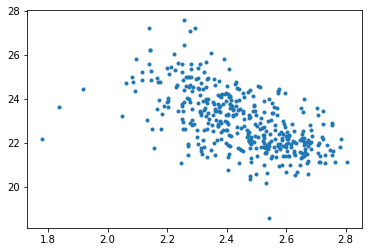

In [56]:
plt.plot(logWimx_, mu50_w1, '.')

-0.08417653840846562

-0.08417653840846562 0.6219533111834552
0.6211933653725881
0.5798546268809677
0.5876587155994234


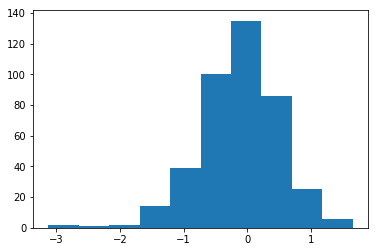

In [38]:
plt.hist(delta)
print np.median(delta)

Y_fit2 = delta
med = np.median(Y_fit2)
std = np.sqrt(np.mean((Y_fit2-med)**2))
indx, = np.where(Y_fit2<med+3*std)
Y_fit1 = Y_fit2[indx]
indx, = np.where(Y_fit1>med-3*std)
Y_fit2 = Y_fit1[indx]
print
print med, std
print np.std(delta)
print np.std(Y_fit2)
print np.sqrt(np.mean(Y_fit2**2))

In [39]:
def Plot_D_mu(ax, X, Y, xlim=None, ylim=[2.5,-3], x_text='', xlabel=False, ylabel=False, rangeLim=None):
    
    dye = {"u":"blue","g":"green","r":"red","i":"orange","z":"maroon","w1":"purple", 'w2': "brown"}
    
    indx = np.where(X>-10000)
    X = X[indx]
    Y = Y[indx]
    
    if rangeLim is None:
        rangeLim = [-1000,1000]
        
    X_fit = []
    Y_fit = []
    for i, yy in enumerate(Y):
        if yy<1.5 and yy>-1.5 and X[i]<rangeLim[1] and X[i]>rangeLim[0]:
            ax.plot(X[i], yy, '+', color='black')
            X_fit.append(X[i])
            Y_fit.append(yy)
        else:
            ax.plot(X[i], yy, 'o', color='black', markerfacecolor='white')
    
    X_fit = np.asarray(X_fit)
    Y_fit = np.asarray(Y_fit)
    
    ####################################################
    if rangeLim[1] != 1000:
        ll = np.max([rangeLim[0],np.min(X_fit)])
        uu = np.min([rangeLim[1],np.max(X_fit)])
    else: 
        ll = np.min(X_fit)
        uu = np.max(X_fit)
    dd = (uu-ll)/5.
    
    for i in np.arange(ll,uu,dd):
        xp = []
        yp = []
        for ii in range(len(X_fit)):
            xi = X_fit[ii]
            if xi>=i and xi<i+dd:
                xp.append(xi)
                yp.append(Y_fit[ii])
        if len(xp)>0:
            ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                        color='red', alpha=1.0)     
    ####################################################
    
    if xlim is None:
        # ax.set_ylim([-2.5,2])
        Xlm = ax.get_xlim()
        set_axes([ax], Xlm, ylim)
    else:
        set_axes([ax], xlim, ylim)

    fit, cov = curve_fit(linfit, X_fit, Y_fit)
    m, b = fit
    x = np.linspace(np.min(X),np.max(X), 100)
    y = m*x+b
    ax.plot(x, y, 'g-', linewidth=2)
    me = np.sqrt(cov[0,0])
    be = np.sqrt(cov[1,1])
    mbe = cov[1,0]

    dy = np.sqrt(x**2*me**2+be**2+2*x*mbe)
    ax.fill_between(x, y+2*dy, y-2*dy, color='r', alpha=0.3)

    Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()


    x0 = 0.97*Xlm[0]+0.03*Xlm[1]
    y0 = 0.07*Ylm[0]+0.93*Ylm[1]
    ax.text(x0,y0, "Slope = "+"%.2f" % m+'$\pm$'+"%.2f" % me, fontsize=16, color='k')
    y0 = 0.15*Ylm[0]+0.85*Ylm[1]
    ax.text(x0,y0, "ZP = "+"%.2f" % b+'$\pm$'+"%.2f" % be, fontsize=16, color='k')

    data = {'X':X_fit, 'Y':Y_fit}
    d = pd.DataFrame.from_dict(data)
    corr = d.corr()
    y0 = 0.23*Ylm[0]+0.77*Ylm[1]
    ax.text(x0,y0, r'$Corr.=$'+'%.2f'%corr['X']['Y'], fontsize=16, color='red')

    if xlabel:
        ax.set_xlabel(x_text, fontsize=20, labelpad=7)
    if ylabel:
        band_label = band
        if band=='w1' or band=='w2':
            band_label = band.upper()
        ax.set_ylabel(band_label+r'$^*-$'+' Mean Correalation', fontsize=20, labelpad=7)

    x0 = 0.65*Xlm[0]+0.35*Xlm[1]
    y0 = 0.95*Ylm[0]+0.05*Ylm[1]
    
    Y_fit2 = Y_fit
    X_fit2 = X_fit
    
    for i in range(5):
        med = np.median(Y_fit2)
        std = np.sqrt(np.mean((Y_fit2-med)**2))
        indx, = np.where(Y_fit2<med+3*std)
        Y_fit1 = Y_fit2[indx]
        X_fit1 = X_fit2[indx]
        indx, = np.where(Y_fit1>med-3*std)
        Y_fit2 = Y_fit1[indx]
        X_fit2 = X_fit1[indx]
    
    
    
    
    ax.text(x0,y0, "RMS = "+"%.2f" % np.sqrt(np.mean(Y_fit2**2))+' mag', fontsize=16, color=dye[band])
#     ax.text(x0,y0+0.2, "std = "+"%.2f" % np.std(Y_fit**2)+' mag', fontsize=16, color=dye[band])
    
    Delta_new = Y_fit2 - (m*X_fit2+b)
    
    x0 = 0.27*Xlm[0]+0.73*Xlm[1]
    ax.text(x0,y0, "-> "+"%.2f" % np.sqrt(np.mean(Delta_new**2)), fontsize=16, color='k') 
#     ax.text(x0,y0+0.2, "-> "+"%.2f" % np.std(Delta_new), fontsize=16, color='k') 
    
    return m, b

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

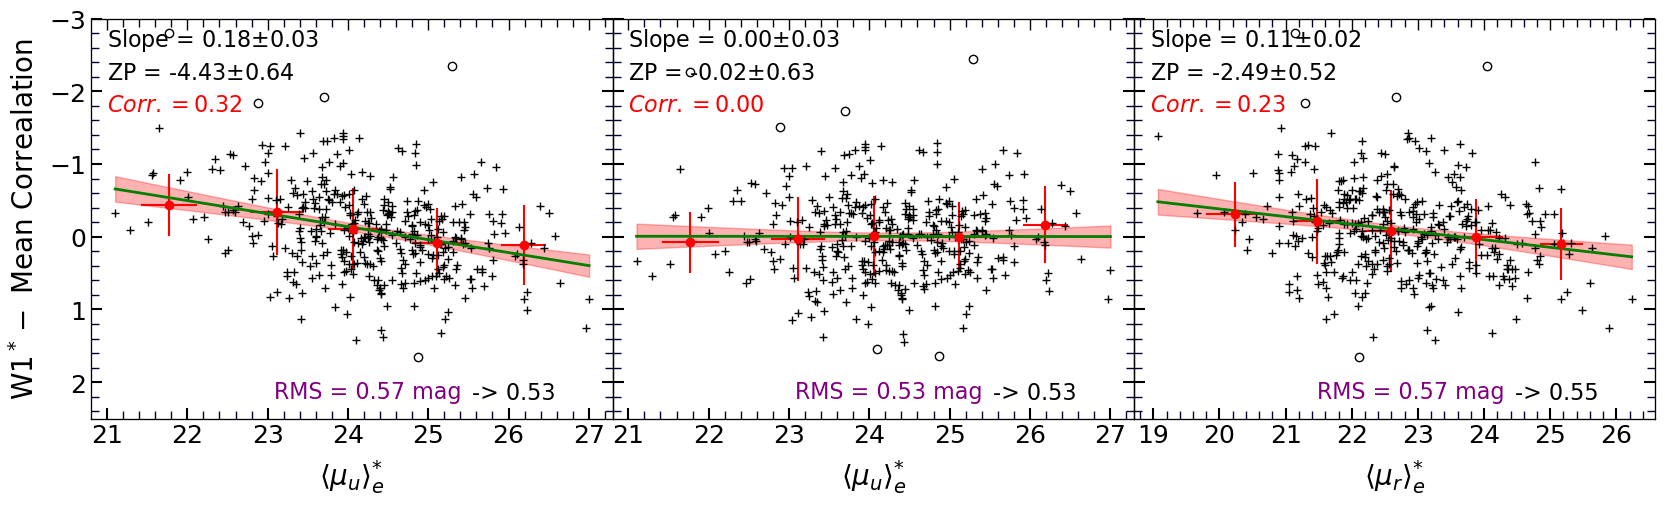

In [40]:
fig = py.figure(figsize=(17, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])


m, b = Plot_D_mu(ax1, mu50_u, delta, x_text=r'$\langle \mu_u \rangle^{*}_e$', xlabel=True, ylabel=True)
Plot_D_mu(ax2, mu50_u, delta-(m*mu50_u+b), x_text=r'$\langle \mu_u \rangle^{*}_e$', xlabel=True)



# Plot_D_mu(ax2, mu50_g, delta, x_text=r'$\langle \mu_g \rangle^{*}_e$', xlabel=True)
Plot_D_mu(ax3, mu50_r, delta, x_text=r'$\langle \mu_r \rangle^{*}_e$', xlabel=True)

plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)


-0.08417653840846562

-0.08417653840846562 0.6219533111834552
0.6211933653725881
0.5798546268809677
0.5876587155994234


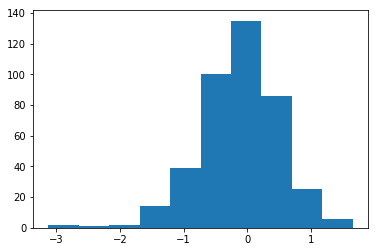

In [41]:
plt.hist(delta)
print np.median(delta)

Y_fit2 = delta
med = np.median(Y_fit2)
std = np.sqrt(np.mean((Y_fit2-med)**2))
indx, = np.where(Y_fit2<med+3*std)
Y_fit1 = Y_fit2[indx]
indx, = np.where(Y_fit1>med-3*std)
Y_fit2 = Y_fit1[indx]
print
print med, std
print np.std(delta)
print np.std(Y_fit2)
print np.sqrt(np.mean(Y_fit2**2))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

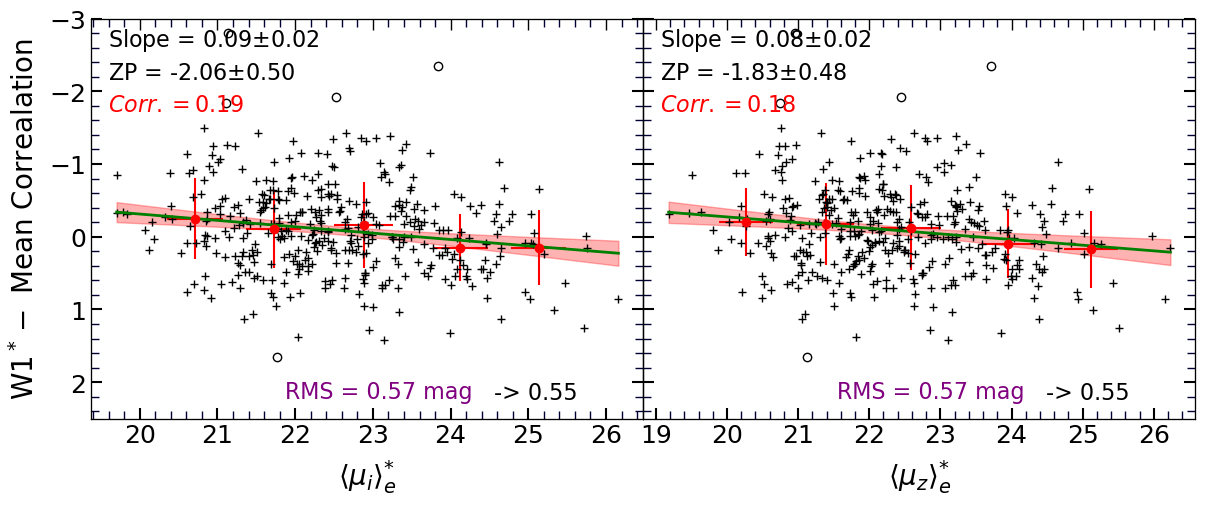

In [42]:
fig = py.figure(figsize=(12, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])


Plot_D_mu(ax1, mu50_i, delta, x_text=r'$\langle \mu_i \rangle^{*}_e$', xlabel=True, ylabel=True)
Plot_D_mu(ax2, mu50_z, delta, x_text=r'$\langle \mu_z \rangle^{*}_e$', xlabel=True)

plt.setp(ax2.get_yticklabels(), visible=False)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

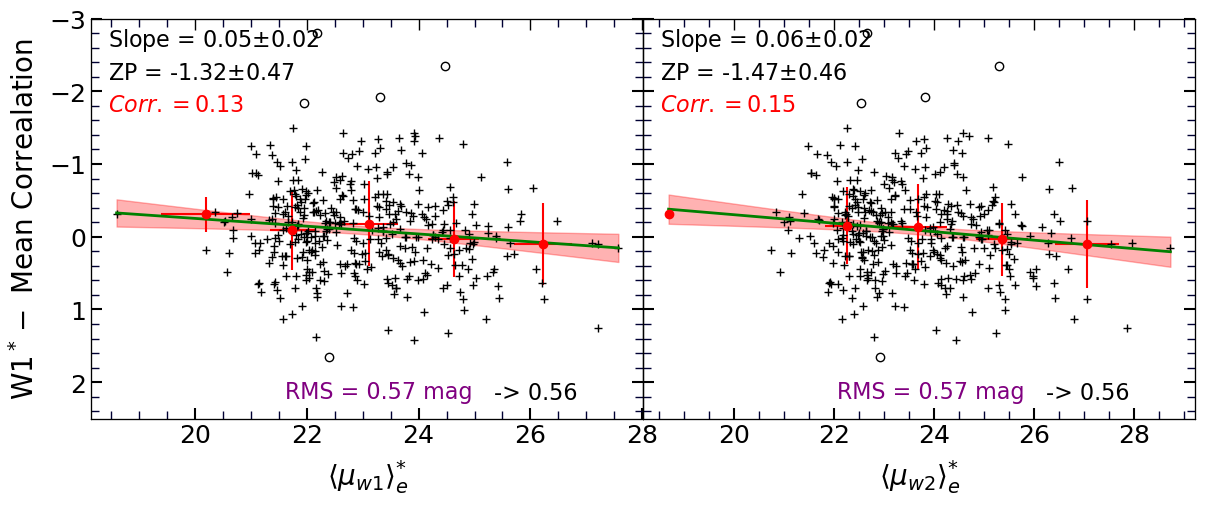

In [43]:
fig = py.figure(figsize=(12, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])


Plot_D_mu(ax1, mu50_w1, delta, x_text=r'$\langle \mu_{w1} \rangle^{*}_e$', xlabel=True, ylabel=True)
Plot_D_mu(ax2, mu50_w2, delta, x_text=r'$\langle \mu_{w2} \rangle^{*}_e$', xlabel=True)

plt.setp(ax2.get_yticklabels(), visible=False)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

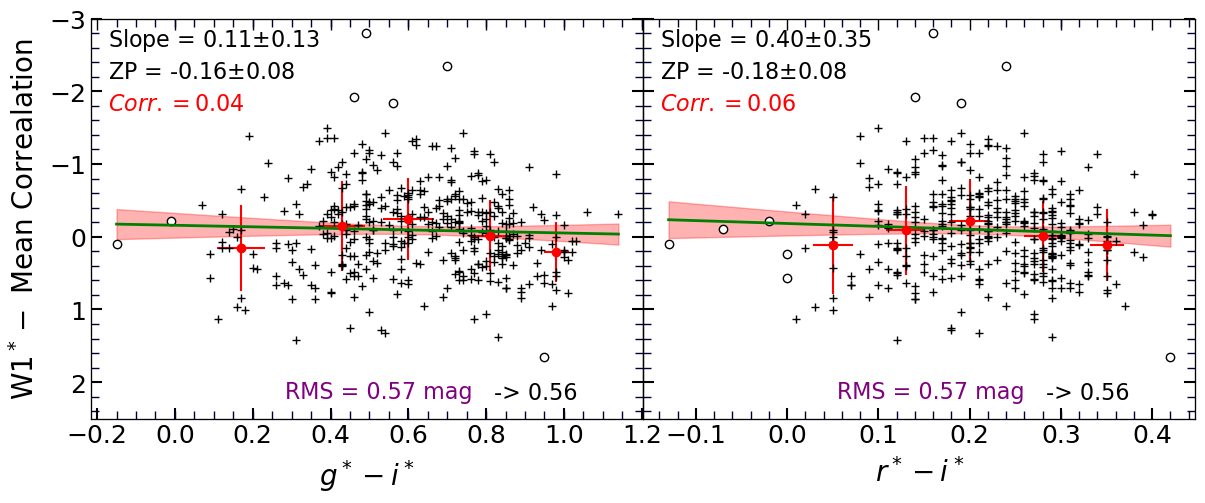

In [44]:
fig = py.figure(figsize=(12, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])


Plot_D_mu(ax1, g_i, delta, x_text=r'$g^*-i^*$', xlabel=True, ylabel=True, rangeLim=[0,100])
Plot_D_mu(ax2, r_i, delta, x_text=r'$r^*-i^*$', xlabel=True, rangeLim=[0,100])

plt.setp(ax2.get_yticklabels(), visible=False)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

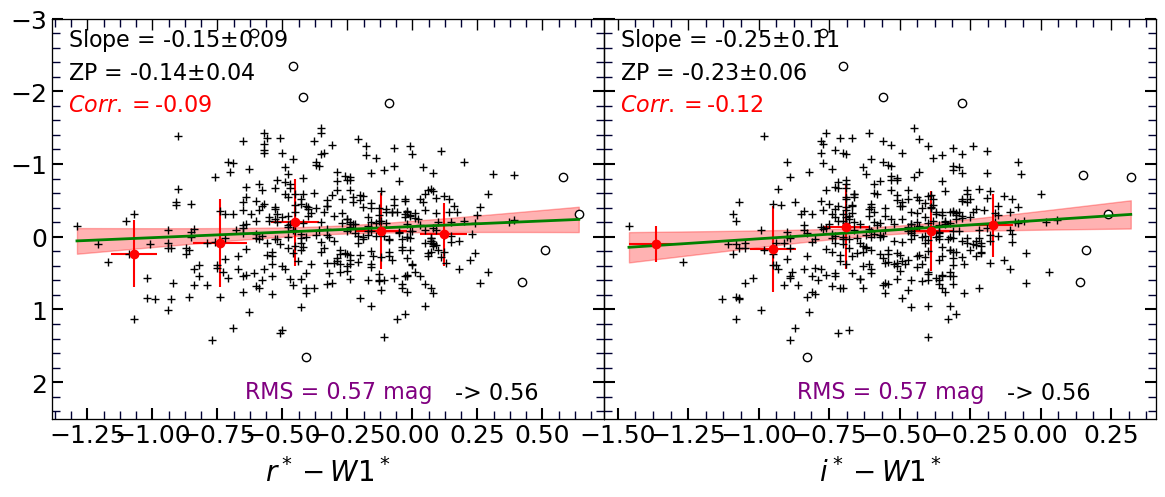

In [45]:
fig = py.figure(figsize=(12, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])


Plot_D_mu(ax1, r_w1, delta, x_text=r'$r^*-W1^*$', xlabel=True, rangeLim=[-100,0.4])
Plot_D_mu(ax2, i_w1, delta, x_text=r'$i^*-W1^*$', xlabel=True, rangeLim=[-100,0.1])

plt.setp(ax2.get_yticklabels(), visible=False)

-0.08417653840846562

-0.08417653840846562 0.6219533111834552
0.6211933653725881
0.5798546268809677
0.5876587155994234


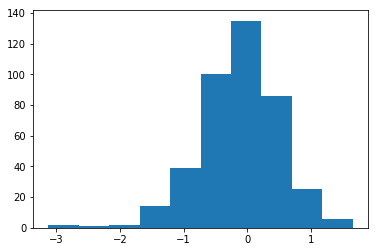

In [46]:
plt.hist(delta)
print np.median(delta)

Y_fit2 = delta
med = np.median(Y_fit2)
std = np.sqrt(np.mean((Y_fit2-med)**2))
indx, = np.where(Y_fit2<med+3*std)
Y_fit1 = Y_fit2[indx]
indx, = np.where(Y_fit1>med-3*std)
Y_fit2 = Y_fit1[indx]
print
print med, std
print np.std(delta)
print np.std(Y_fit2)
print np.sqrt(np.mean(Y_fit2**2))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

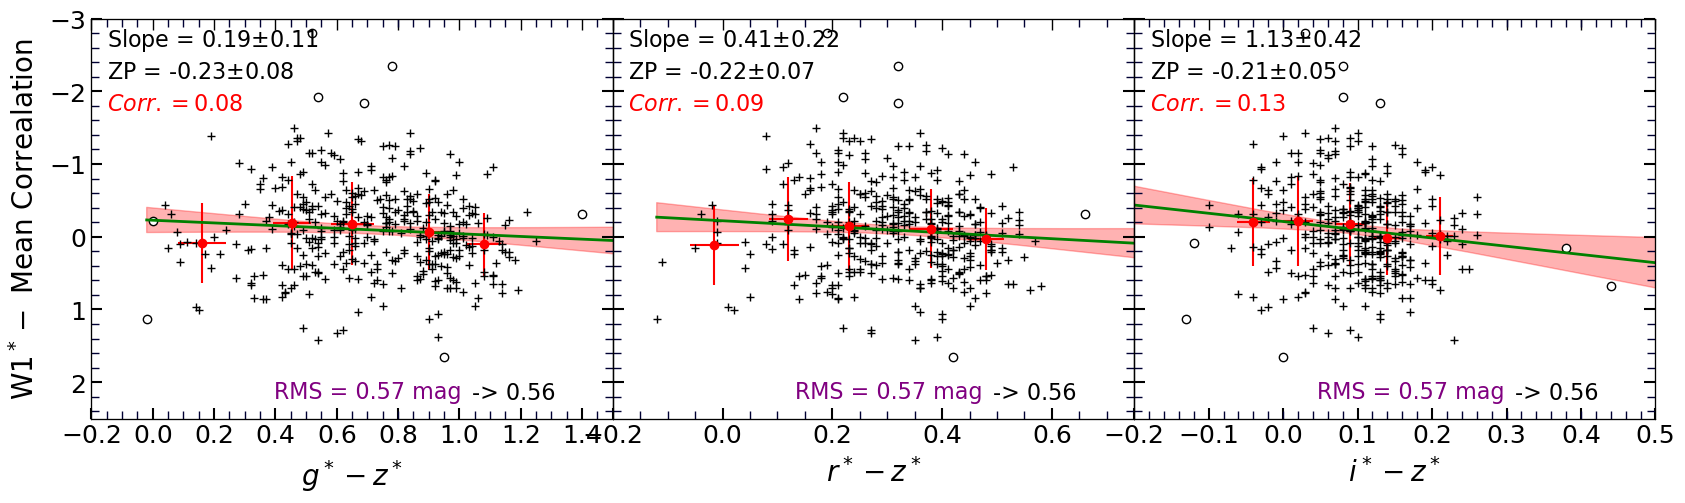

In [47]:
fig = py.figure(figsize=(17, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])


Plot_D_mu(ax1, g_z, delta, x_text=r'$g^*-z^*$', xlabel=True, ylabel=True, xlim=[-0.2,1.5], rangeLim=[0,1.3])
Plot_D_mu(ax2, r_z, delta, x_text=r'$r^*-z^*$', xlabel=True, xlim=[-0.2,0.75], rangeLim=[-0.5,0.65])
Plot_D_mu(ax3, i_z, delta, x_text=r'$i^*-z^*$', xlabel=True, xlim=[-0.2,0.5], rangeLim=[-0.1,0.3])

plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

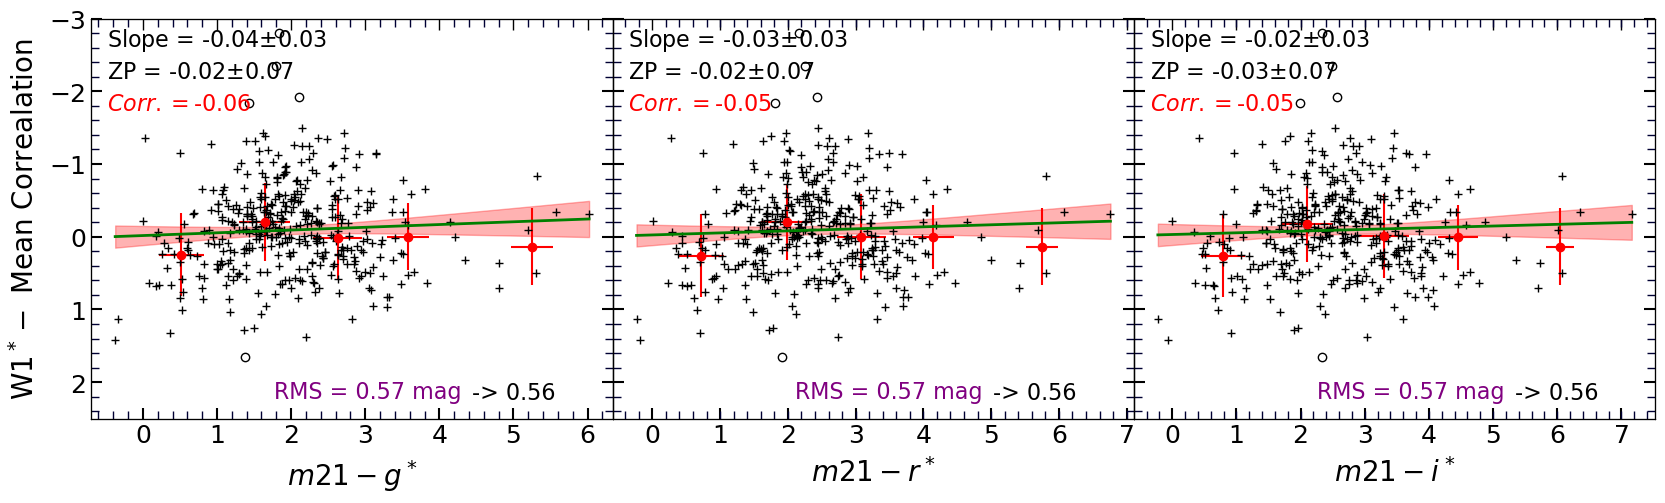

In [48]:
fig = py.figure(figsize=(17, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])


Plot_D_mu(ax1, m21_g, delta, x_text=r'$m21-g^*$', xlabel=True, ylabel=True)
Plot_D_mu(ax2, m21_r, delta, x_text=r'$m21-r^*$', xlabel=True)
Plot_D_mu(ax3, m21_i, delta, x_text=r'$m21-i^*$', xlabel=True)

plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

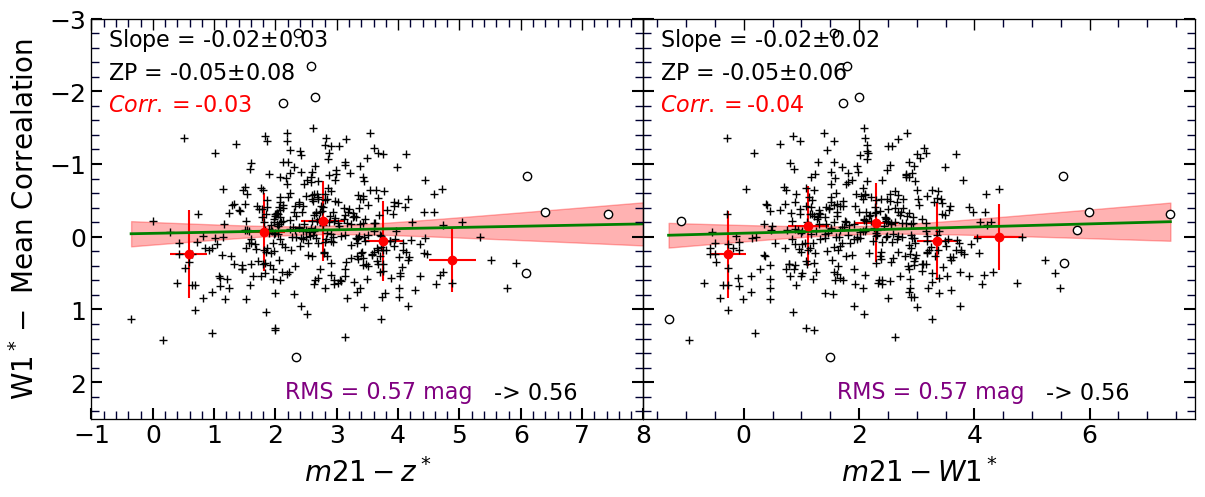

In [49]:
fig = py.figure(figsize=(12, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

Plot_D_mu(ax1, m21_z, delta, x_text=r'$m21-z^*$', xlabel=True, ylabel=True, xlim=[-1,8], rangeLim=[-1,6])
Plot_D_mu(ax2, m21_w, delta, x_text=r'$m21-W1^*$', xlabel=True, rangeLim=[-1,5.5])

plt.setp(ax2.get_yticklabels(), visible=False)

-0.08417653840846562

-0.08417653840846562 0.6219533111834552
0.6211933653725881
0.5798546268809677
0.5876587155994234


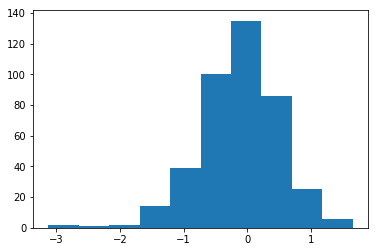

In [50]:
plt.hist(delta)
print np.median(delta)

Y_fit2 = delta
med = np.median(Y_fit2)
std = np.sqrt(np.mean((Y_fit2-med)**2))
indx, = np.where(Y_fit2<med+3*std)
Y_fit1 = Y_fit2[indx]
indx, = np.where(Y_fit1>med-3*std)
Y_fit2 = Y_fit1[indx]
print
print med, std
print np.std(delta)
print np.std(Y_fit2)
print np.sqrt(np.mean(Y_fit2**2))


-0.08417653840846562 0.6219533111834552
0.6211933653725881
0.6211933653725881
0.6317326748411419


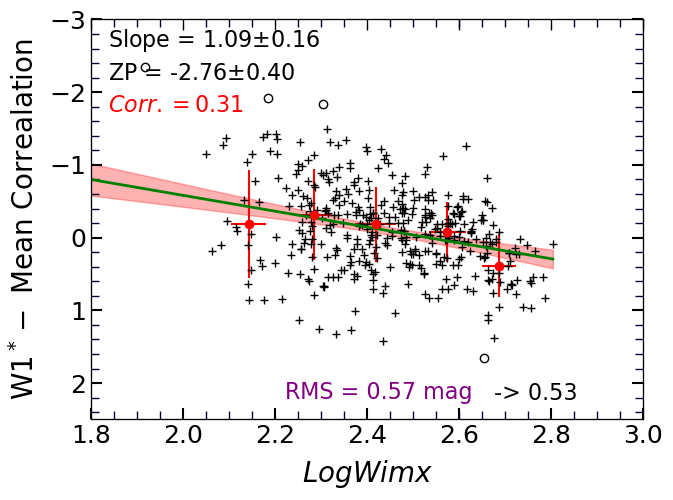

In [51]:
fig = py.figure(figsize=(12, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
ax1 = plt.subplot(gs[0])
# ax2 = plt.subplot(gs[1])

Plot_D_mu(ax1, logWimx_, delta, x_text=r'$LogWimx$', xlabel=True, ylabel=True, xlim=[1.8,3])

# ax1.errorbar(logWimx_, delta, yerr=delta_e, fmt= '.', alpha=0.3, color='purple')
# fit, cov = curve_fit(linfit, logWimx_, delta, sigma=delta_e)
# m, b = fit
# x = np.linspace(1.8,3, 100)
# y = m*x+b
# ax1.plot(x, y, 'g-', linewidth=2)
# print fit

# ll = 2.2
# uu = 2.7
# dd = (uu-ll)/4.

# for i in np.arange(ll,uu,dd):
#     xp = []
#     yp = []
#     for ii in range(len(logWimx_)):
#         xi = logWimx_[ii]
#         if xi>=i and xi<i+dd:
#             xp.append(xi)
#             yp.append(delta[ii])
#     if len(xp)>0:
#         ax1.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
#                     color='k', alpha=1.0, capsize=3) 
#         print np.std(yp)
        

Y_fit2 = delta
med = np.median(Y_fit2)
std = np.sqrt(np.mean((Y_fit2-med)**2))
indx, = np.where(Y_fit2<med+5*std)
Y_fit1 = Y_fit2[indx]
indx, = np.where(Y_fit1>med-5*std)
Y_fit2 = Y_fit1[indx]
print
print med, std
print np.std(delta)
print np.std(Y_fit2)
print np.sqrt(np.mean(Y_fit2**2))

(array([  2.,   1.,   2.,  14.,  39., 100., 135.,  86.,  25.,   6.]),
 array([-3.11929535, -2.64196948, -2.16464361, -1.68731774, -1.20999187,
        -0.732666  , -0.25534012,  0.22198575,  0.69931162,  1.17663749,
         1.65396336]),
 <a list of 10 Patch objects>)

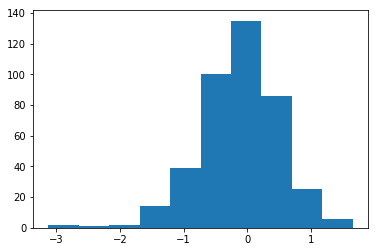

In [52]:
plt.hist(delta)

In [53]:
a = np.random.normal(0,1,100000)
print np.std(a)
print np.mean(a)
print np.median(a)
print np.sqrt(np.mean(a**2))
print np.sqrt(np.median(a**2))
print np.mean((a-np.median(a))**2)

1.0014724815709057
0.00011756971551755044
0.00032420277887538844
1.001472488472063
0.6766016102515574
1.002947174041011


[0.01166223 0.23546553]
0.47823542249496137
0.5571022966196503
0.7282425497053212
1.1171797945825146


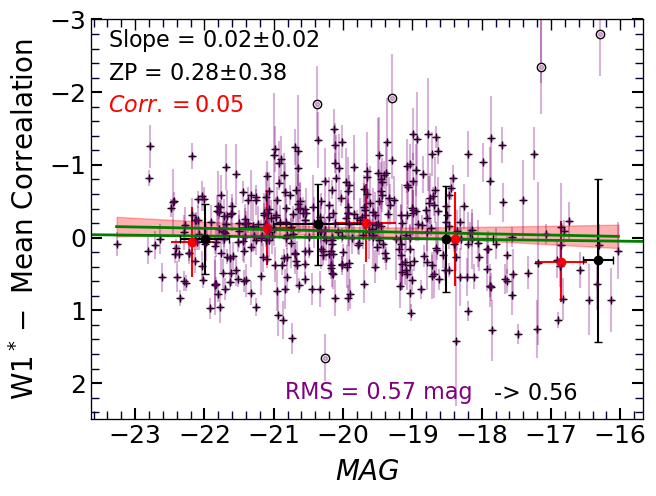

In [54]:
fig = py.figure(figsize=(12, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
ax1 = plt.subplot(gs[0])
# ax2 = plt.subplot(gs[1])

Plot_D_mu(ax1, MAG_, delta, x_text=r'$MAG$', xlabel=True, ylabel=True)

ax1.errorbar(MAG_, delta, yerr=delta_e, fmt= '.', alpha=0.3, color='purple')
fit, cov = curve_fit(linfit, MAG_, delta, sigma=delta_e)
m, b = fit
x = np.linspace(-24,-12, 100)
y = m*x+b
ax1.plot(x, y, 'g-', linewidth=2)
print fit

ll = -24
uu = -12
dd = (uu-ll)/5.

for i in np.arange(ll,uu,dd):
    xp = []
    yp = []
    for ii in range(len(MAG_)):
        xi = MAG_[ii]
        if xi>=i and xi<i+dd:
            xp.append(xi)
            yp.append(delta[ii])
    if len(xp)>0:
        ax1.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='k', alpha=1.0, capsize=3) 
        print np.std(yp)